<a href="https://colab.research.google.com/github/lala991204/DL-self-study/blob/master/3_4_model_configuration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

# load_data()로 데이터셋 로드
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 로드된 데이터셋 확인
print('train set:', x_train.shape, y_train.shape)
print('test set:', x_test.shape, y_test.shape)

# 데이터 정규화
x_train = x_train / x_train.max()     # max: 255
x_test = x_test / x_test.max()        # max: 255

train set: (60000, 28, 28) (60000,)
test set: (10000, 28, 28) (10000,)


# 초기값 설정 & Regularization & Dropout

Dense layer는 default로 글로럿 초기화(Xavier 초기화) 방법이 설정되어 있다.

In [ ]:
dense = tf.keras.layers.Dense(256, activation='relu')
print(dense.get_config()['kernel_initializer'])

# 문자열 초기화
dense = tf.keras.layers.Dense(256, kernel_initializer='he_normal', activation='relu')
print(dense.get_config()['kernel_initializer'])

# 클래스 인스턴스 초기화
he_normal = tf.keras.initializers.HeNormal()
dense = tf.keras.layers.Dense(256, kernel_initializer=he_normal, activation='relu')
print(dense.get_config()['kernel_initializer'])

{'class_name': 'GlorotUniform', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}
{'class_name': 'HeNormal', 'config': {'seed': None}}


모델의 과대적합을 해소하기 위해 L1, L2 규제를 적용하기도 한다.
default로는 규제를 적용하지 않고 있음을 알 수 있다.

In [ ]:
# 기본값
dense = tf.keras.layers.Dense(256, activation='relu')
print(dense.get_config())

# l1 규제 적용
dense = tf.keras.layers.Dense(256, kernel_regularizer='l1', activation='relu')
print(dense.get_config()['kernel_regularizer'])

# 클래스 인스턴스 적용, alpha=0.1 변경
regularizer = tf.keras.regularizers.l1(l1=0.1)
dense = tf.keras.layers.Dense(256, kernel_regularizer=regularizer, activation='relu')
print(dense.get_config()['kernel_regularizer'])

{'name': 'dense_22', 'trainable': True, 'dtype': 'float32', 'units': 256, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'class_name': 'L1', 'config': {'l1': 0.009999999776482582}}
{'class_name': 'L1', 'config': {'l1': 0.10000000149011612}}


모델 훈련 시에는 dropout이 적용되어 노드 중 일부만 훈련하게 되지만, 예측 시점에는 모든 노드들이 활용된다. (과대적합 방지)

In [ ]:
# Dropout 25% 비율 적용(25%의 노드가 삭제)
tf.keras.layers.Dropout(0.25)    # 노드에서 제거되는 비율을 적음.

# Batch Normalization

In [ ]:
# Model A: Dense + ReLU
model_a = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(32, activation='relu'),
          tf.keras.layers.Dense(10, activation='softmax'),
])
model_a.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                50240     
                                                                 
 dense_26 (Dense)            (None, 32)                2080      
                                                                 
 dense_27 (Dense)            (None, 10)                330       
                                                                 
Total params: 52,650
Trainable params: 52,650
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model B: Dense + BatchNorm + ReLU
model_b = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28,28)),
          tf.keras.layers.Dense(64),
          # 배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          # 배치 정규화 후 활성화 함수 적용 (*배치 정규화 적용시, 따로 활성화 함수 적용시켜줌!)
          tf.keras.layers.Activation('relu'),

          tf.keras.layers.Dense(32),
          # 배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          # 배치 정규화 후 활성화 함수 적용
          tf.keras.layers.Activation('relu'),

          tf.keras.layers.Dense(10, activation='softmax'),
])
model_b.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_28 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_5 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 activation_2 (Activation)   (None, 64)                0         
                                                                 
 dense_29 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_6 (Batc  (None, 32)               128       
 hNormalization)                                      

아래의 그림을 보다시피, 배치 정규화만 추가하였는데 loss는 이전 대비 더 안정적이고 빠르게 수렴한다는 것을 확인 가능

# Activation Function

In [ ]:
# LeakyReLU 기본 설정
tf.keras.layers.LeakyReLU()

# LeakyReLU, alpha=0.2로 변경
tf.keras.layers.LeakyReLU(alpha=0.2)

In [ ]:
# Model C: Dense + BatchNorm + LeakyReLU(0.2)
model_c = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(28, 28)),
          tf.keras.layers.Dense(64),
          # 배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          # LeakyReLU, alpha=0.2 적용
          tf.keras.layers.LeakyReLU(alpha=0.2),
          
          tf.keras.layers.Dense(32),
          # 배치 정규화 적용
          tf.keras.layers.BatchNormalization(),
          # LeakyReLU, alpha=0.2 적용
          tf.keras.layers.LeakyReLU(alpha=0.2),
        
          tf.keras.layers.Dense(10, activation='softmax'),
])

# 모델 요약
model_c.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 784)               0         
                                                                 
 dense_31 (Dense)            (None, 64)                50240     
                                                                 
 batch_normalization_7 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 64)                0         
                                                                 
 dense_32 (Dense)            (None, 32)                2080      
                                                                 
 batch_normalization_8 (Batc  (None, 32)               128       
 hNormalization)                                      

In [ ]:
model_a.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_b.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model_c.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Model A: Dense + ReLU
history_a = model_a.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=10)

# Model B: Dense + BatchNorm + ReLU
history_b = model_b.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=10)

# Model C: Dense + BatchNorm + LeakyReLU(0.2)
history_c = model_c.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2959 - accuracy: 0.9151 - val_loss: 0.1556 - val_accuracy: 0.9552
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1308 - accuracy: 0.9607 - val_loss: 0.1346 - val_accuracy: 0.9591
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0971 - accuracy: 0.9703 - val_loss: 0.1005 - val_accuracy: 0.9688
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0767 - accuracy: 0.9767 - val_loss: 0.0997 - val_accuracy: 0.9672
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0638 - accuracy: 0.9800 - val_loss: 0.0893 - val_accuracy: 0.9740
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0547 - accuracy: 0.9827 - val_loss: 0.0919 - val_accuracy: 0.9738
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0458 - accuracy: 0.9852 - val_loss: 0.0941 - val_accuracy

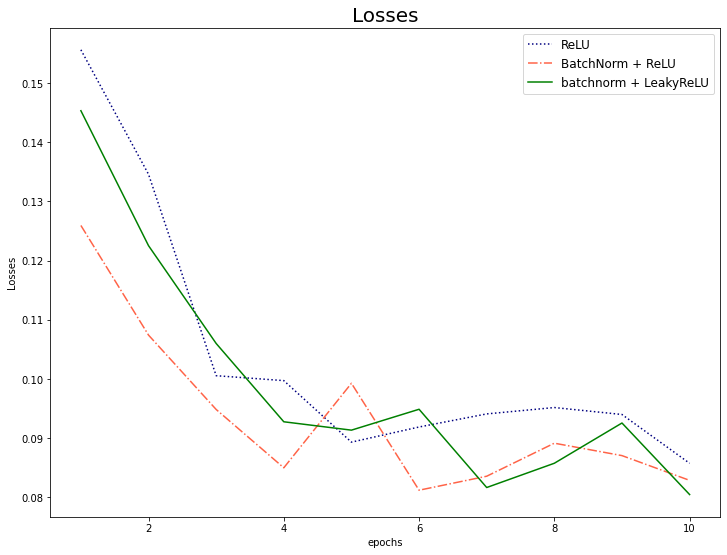

In [ ]:
plt.figure(figsize=(12, 9))
plt.plot(np.arange(1, 11), history_a.history['val_loss'], color='navy', linestyle=':')      # epochs=10이므로
plt.plot(np.arange(1, 11), history_b.history['val_loss'], color='tomato', linestyle='-.')
plt.plot(np.arange(1, 11), history_c.history['val_loss'], color='green', linestyle='-')

plt.title('Losses', fontsize=20)
plt.xlabel('epochs')
plt.ylabel('Losses')
plt.legend(['ReLU', 'BatchNorm + ReLU', 'batchnorm + LeakyReLU'], fontsize=12)
plt.show()

mnist dataset은 모델별 차이가 크지는 않다. 하지만 좀 더 복잡한 데이터셋을 다룬다면 이에 대해 좀 더 관찰해 볼 필요가 있다.